In [1]:
#Hace falta instalar geoplot, no esta dentro del ambiente especificado
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import geoplot
import folium
import seaborn as sns
%matplotlib inline

## Define funciones

In [2]:
def choropleth(geo_df,col):
    """
    Imprime mapa a partir de GeoDataFrame geo_df, mostrando la columna especificada
    """
    return geoplot.choropleth(geo_df,hue=geo_df[col],figsize=(10,10),cmap='RdBu')

### Importa tablas de dataset

In [3]:
geographic = pd.read_csv('../Dataset/geographic.csv')
geographic.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [4]:
demographics = pd.read_csv('../Dataset/demographics.csv')
demographics.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [5]:
weather = pd.read_csv('../Dataset/weather.csv')

In [6]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude
0,1/1/14,34,24,29.0,0,0,0,JFK,40.64749,-73.779982
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982
3,1/4/14,31,3,17.0,0,0,7,JFK,40.64749,-73.779982
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982


In [7]:
mta_trips = pd.read_csv('../Dataset/mta_trips.csv')

C:\Users\Jazuero\AppData\Local\Continuum\anaconda3\envs\cursoML\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
mta_trips.head()

,station,line_name,division,audit_type,unit_id,datetime,new_entries,new_exits,latitude,longitude
0,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 05:00:00,4,6,40.703087,-74.012994
1,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 09:00:00,1,13,40.703087,-74.012994
2,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 13:00:00,1,8,40.703087,-74.012994
3,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 17:00:00,1,8,40.703087,-74.012994
4,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 21:00:00,2,3,40.703087,-74.012994


In [100]:
viajes_uber_2014 = pd.read_csv('../Dataset/uber_trips_2014.csv')

In [101]:
viajes_uber_2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


### Prepara shape a partir de geographic y demographic

In [9]:
res_dic = {}
for c in geographic.columns:
    res_dic[c] = []

In [10]:
for i in np.arange(0,len(geographic),2):
    for c in geographic.columns:
        if not(np.isnan(geographic.iloc[i].loc[c]) or np.isnan(geographic.iloc[i+1].loc[c])):
            res_dic[c] = res_dic[c] + [(geographic.iloc[i].loc[c],geographic.iloc[i+1].loc[c])]

In [11]:
geo_df_res = gpd.GeoDataFrame(columns = ['geometry','nta_code'])

for z in res_dic:
    geo_df_res.loc[z] = shp.geometry.Polygon(tuple(res_dic[z]))

geo_df_res['nta_code']=geo_df_res.index  

In [12]:
geo_df_res

,geometry,nta_code
BK88,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",BK88
QN52,"POLYGON ((-73.79493 40.75781, -73.79475 40.755...",QN52
QN48,"POLYGON ((-73.77574 40.74333, -73.77580 40.743...",QN48
QN51,"POLYGON ((-73.80379 40.77562, -73.80099 40.775...",QN51
QN27,"POLYGON ((-73.86110 40.76367, -73.85993 40.762...",QN27
...,...,...
MN32,"POLYGON ((-73.93805 40.78084, -73.93790 40.780...",MN32
MN33,"POLYGON ((-73.93505 40.79170, -73.93511 40.791...",MN33
MN99,"POLYGON ((-74.01093 40.68450, -74.01193 40.683...",MN99
QN18,"POLYGON ((-73.85873 40.73572, -73.85867 40.735...",QN18


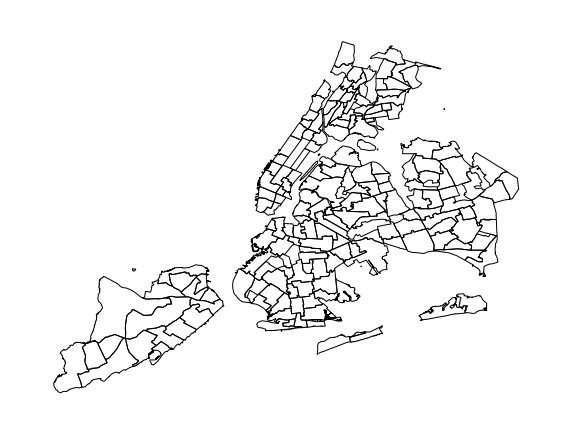

In [13]:
geoplot.polyplot(geo_df_res,figsize=(10,10))

In [14]:
merged = pd.merge(geo_df_res, demographics, on='nta_code', how='inner')
merged.head()

,geometry,nta_code,nta_name,borough,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",BK88,Borough Park,Brooklyn,106357,14703,11971,10024,9094,8640,...,4893,3850,3711,4098,2136,2486,1043,783,35754,55689
1,"POLYGON ((-73.79493 40.75781, -73.79475 40.755...",QN52,East Flushing,Queens,26982,1350,1318,1281,1602,2048,...,853,739,1151,1329,1080,1386,425,316,55971,70852
2,"POLYGON ((-73.77574 40.74333, -73.77580 40.743...",QN48,Auburndale,Queens,19996,917,966,1063,1168,1214,...,445,632,690,1417,1060,1237,589,433,70772,84402
3,"POLYGON ((-73.80379 40.77562, -73.80099 40.775...",QN51,Murray Hill,Queens,51739,2539,2295,2254,2743,3236,...,1665,2443,2151,2850,2140,2233,1031,906,52696,71925
4,"POLYGON ((-73.86110 40.76367, -73.85993 40.762...",QN27,East Elmhurst,Queens,23150,1621,1479,1431,1816,1944,...,617,730,1004,1173,860,766,295,128,51594,66284


In [15]:
merged.crs = {'init' :'epsg:4326'}

In [16]:
#merged.to_file('geographic1.shp')

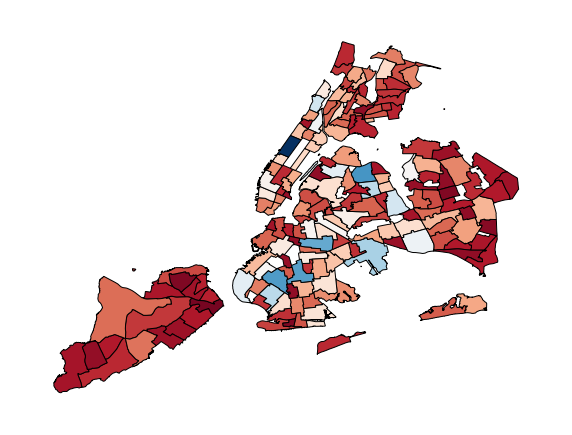

In [17]:
choropleth(merged,'population')

### Base weather

In [18]:
weather_stations = gpd.GeoDataFrame(weather.groupby('location').mean()[['longitude','latitude']])

In [19]:
weather_stations

,longitude,latitude
location,,
Central Park,-73.974187,40.771133
JFK,-73.779982,40.647490
LGA,-73.873966,40.776927


In [20]:
weather_stations['geometry'] = weather_stations.apply(lambda row: 
                                        shp.geometry.Point(row['longitude'],row['latitude']),axis=1)

In [21]:
weather_stations.crs = {'init' :'epsg:4326'}

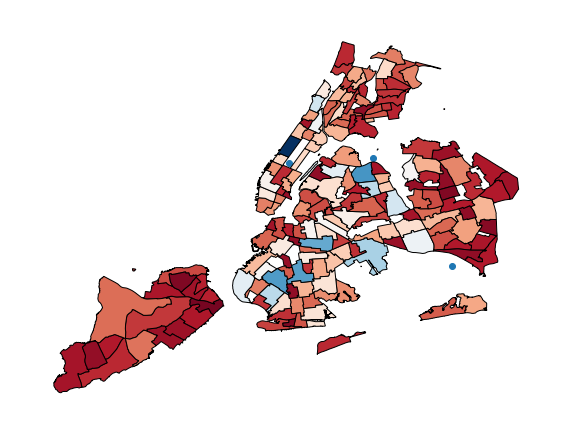

In [22]:
ax = choropleth(merged,'population')
weather_stations.plot(ax=ax)

In [23]:
weather_stations.drop(['longitude','latitude'],axis=1,inplace=True)

In [24]:
for i in range (0,3):
    merged['distance'+weather_stations.index[i]] = merged['geometry'].distance(weather_stations.iloc[i,0])

In [25]:
dicStation = {
    0: 'CP',
    1: 'JFK',
    2: 'LGA'
}
merged['WeatherStation'] = merged.apply(lambda row: dicStation[list(row[-3:]).index(min(list(row[-3:])))],axis=1)

In [26]:
merged.drop(['distanceCentral Park','distanceJFK','distanceLGA'],inplace=True,axis=1)

### Mta trips

### Analisis viajes Uber 2014

In [102]:
#Convierte longitud y latiud a una geometria de shapely
viajes_uber_2014['geometry'] = viajes_uber_2014.apply(lambda row: 
                                    shp.geometry.Point((row['pickup_longitude'],row['pickup_latitude'])),axis=1)
viajes_uber_2014.drop(['pickup_latitude','pickup_longitude','base'],axis=1,inplace=True)
                                                      

In [103]:
#Transforma hora de string a datetime
viajes_uber_2014['datetime'] = pd.to_datetime(viajes_uber_2014['pickup_datetime'],infer_datetime_format=True)

In [104]:
viajes_uber_2014.drop(['pickup_datetime'],axis=1,inplace=True)

In [105]:
#Obtiene identificador unico del dia de viaje
viajes_uber_2014['dia'] = viajes_uber_2014['datetime'].map(lambda x: str(x.year)+'-'+str(x.month)+'-'+str(x.day))

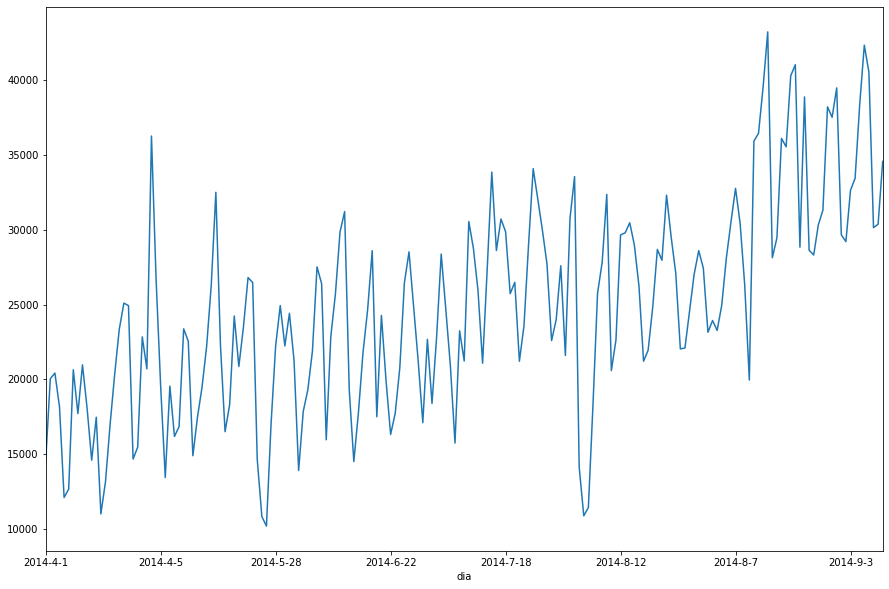

In [106]:
#Genera y plotea viajes por dia
uber_2014_dia = viajes_uber_2014.groupby('dia').count()['datetime']
ax = uber_2014_dia.plot()
ax.figure.set_size_inches(15,10)

In [107]:
viajes_uber_2014 = gpd.GeoDataFrame(viajes_uber_2014)
viajes_uber_2014.crs = {'init': 'epsg:4326'}

In [110]:
viajes_uber_2014 = gpd.sjoin(viajes_uber_2014, merged[['geometry','nta_code']], op='intersects')

In [114]:
viajes_uber_2014.drop(['index_right','dia'],axis=1,inplace=True)

In [116]:
#viajes_uber_2014.to_file('../Shapes/viajes_uber_2014.shp')

DriverSupportError: ESRI Shapefile does not support datetime fields

# Folium

In [62]:
mapa = folium.Map([40.7,-73.95],tiles='cartodbpositron')

In [63]:
zonas = folium.features.Choropleth(merged,data=merged,key_on='feature.properties.nta_code',
                                   columns=['nta_code','median_age'],fill_color='RdPu').add_to(mapa)

In [64]:
mapa.save('../Mapas/mapa2.html')